In [1]:
import networkx as nx
import itertools
import matplotlib
import matplotlib.pyplot as plt

from EVCS_pyomo_concrete import *

def get_color_map(graph, fast, slow): 
    #define color map 
    color_map = []
    for node in graph: 
        if int(fast[node]) == 1: 
            color_map.append("red") #fast chargers in red
        elif int(slow[node]) == 1: 
            color_map.append("blue") #slow chargers in blue
        else: 
            color_map.append("grey") #if no charger placed, node is gray

    return color_map

def print_graph(graph):
    pos=nx.spring_layout(graph)
    edge_weight = nx.get_edge_attributes(graph, 'weight')

    plt.figure(figsize=(30,20))
    #plt.title("Agent Based Model EV Traffic Network")
    plt.title("Network subgraph with subset of edges traversed by EV agents") 
    nx.draw(graph, with_labels=True, node_color = color_map, node_size=500)
    plt.show() 
        

1278045
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-17
Read LP format model from file /var/folders/xh/y_6r6t5d7w108vdd0hdrqmwc0000gn/T/tmpo0f54nk7.pyomo.lp
Reading time = 1.32 seconds
x207496: 399736 rows, 207496 columns, 795106 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 399736 rows, 207496 columns and 795106 nonzeros
Model fingerprint: 0x66a1a621
Model has 90 quadratic objective terms
Model has 8640 quadratic constraints
Variable types: 4321 continuous, 203175 integer (203175 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e-06, 1e-06]
  QObjective range [9e-04, 2e-02]
  Bounds range     [1e+00, 1e+02]
  RHS range        [2e-01, 1e+02]
Presolve removed 397148 

In [2]:
MW, SG, charger_df, soc_df, agent_charge_df, location_dict = get_data()

infra_cost 15366.0
infra_cost_normalized 0.01202305083154349
soc_total 0.9722626005747094
objective funtion -0.48011977487158264


In [7]:
agent_charge_df.to_csv("agent_charge.csv")

In [4]:
fast = list(charger_df["fast chargers"])
slow = list(charger_df["slow chargers"])
color_map = get_color_map(MW.G, fast, slow)

In [8]:
df_test = pd.DataFrame.from_dict(location_dict)
df_test.to_csv("location_dictionary.csv")

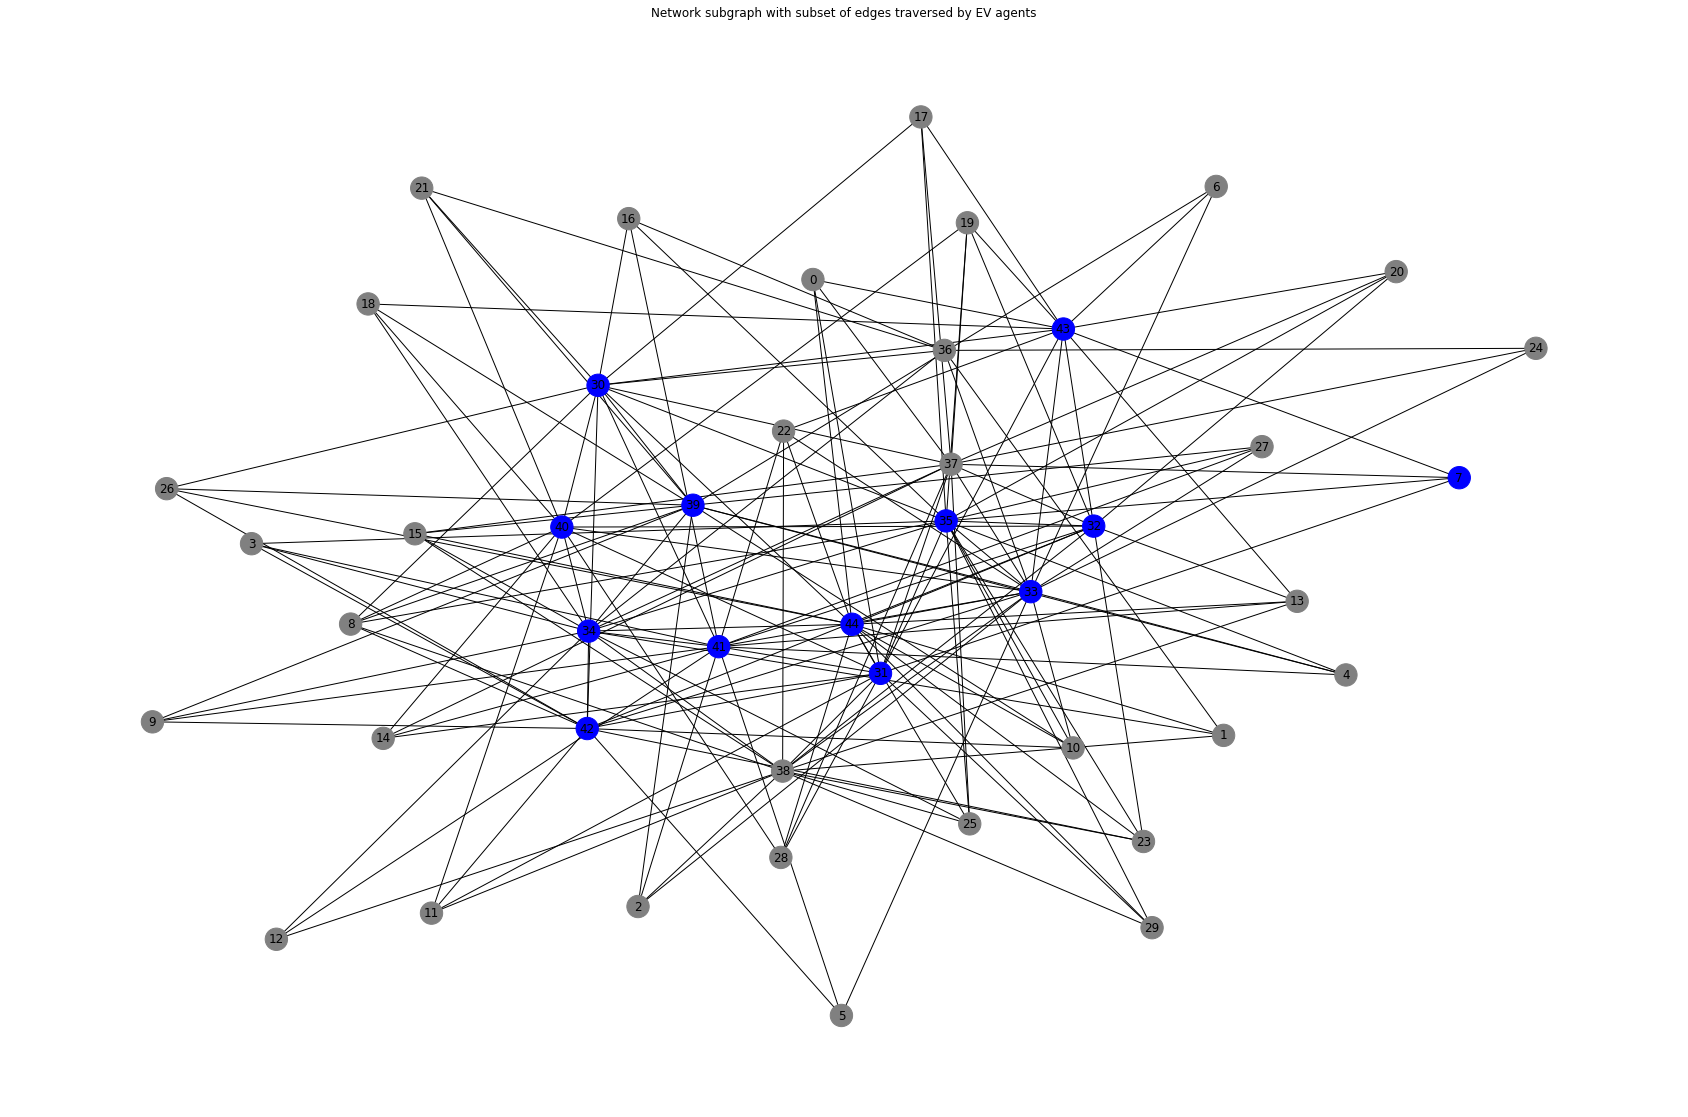

In [6]:
print_graph(SG)

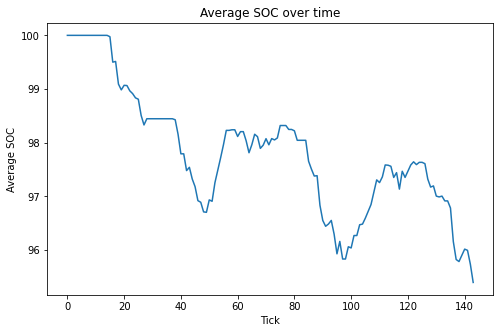

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(soc_df['average soc'])
plt.xlabel("Tick")
plt.ylabel("Average SOC")
plt.title("Average SOC over time")
plt.show()

In [92]:
df_test = pd.DataFrame.from_dict(location_dict)
df_test.to_csv("location_dictionary.csv")

In [78]:
color_map = []
for tick in location_dict.keys():
    # test_data.append(location_dict[tick])
    my_list = []
    for node in location_dict[tick]: 
        node_type = MW.get_node_type(node)
        if node_type == "home": 
            my_list.append("red")
        elif node_type == "work": 
            my_list.append("blue") 
        elif node_type == "store":
            my_list.append("yellow")
    color_map.append(my_list)

In [58]:
test_data = []
for tick in location_dict.keys():
    test_data.append(location_dict[tick])

In [85]:
test_data

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  31,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [34,
  32,
  30,
  33,
  4,
  32,
  34,
  33,
  8,
  31,
  31,
  31,
  12,
  32,
  32,
  31,
  33,
  17,
  31,
  19,
  20,
  21,
  30,
  30,
  31,
  25,
  26,
  31,
  32,
  30],
 [34,
  32,
  30,
  33,
  4,
  32,
  34,
  33,
  32,
  31,
  31,
  31,
  32,
  32,
  32,
  31,
  33,
  33,
  31,
  19,
  20,
  33,
  30,
  30,
  31,
  34,
  26,
  31,
  32,
  30],
 [34,
  32,
  30,
  33,
  31,
  32,
  34,
  33,
  32,
  31,
  31,
  31,
  32,
  32,
  32,
  31,
  33,
  33,
  31,
  33,
  32,
  33,
  30,
  30,
  31,
  34,
  33,
  31,
  32,
  30],
 [34,
  32,
  30,
  33,
  31,
  32,
  34,
  33,
  32,
  31,
  31,
  31,
  32,
  32,
  32,
  31,
  33,
  33,
  31,
  33,
  32,
  33,
  30,
  30,
  31,
  34,
  33,
  31,
  32,
  30],
 [34,
  32,
  30,
  33,
  31,
  32,
  34,
  33,
  32,
  31,
  31,
  31,
  32,
  32,
  32,
  31,
  33,
  33,


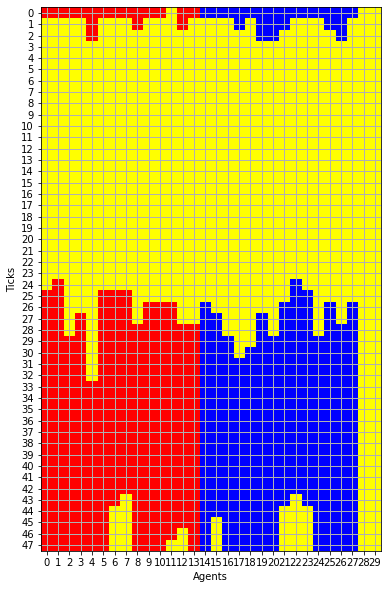

<Figure size 720x720 with 0 Axes>

In [86]:
# import matplotlib.pyplot as plt
# from matplotlib import colors
# import numpy as np

# #data = np.random.rand(10, 10) * 20

# # create discrete colormap
# # cmap = colors.ListedColormap(color_map)

# #cmap = colors.ListedColormap(['yellow', 'blue', "red"])
# #norm = colors.BoundaryNorm(bounds, cmap.N)

# fig, ax = plt.subplots(figsize=(20, 10))

# cmap = colors.ListedColormap(['red', 'blue', "yellow"])
# bounds = [0,30]

# ax.imshow(test_data, cmap=cmap)

# # draw gridlines
# ax.grid(which='major', axis='both', linestyle='-', linewidth=1)
# ax.set_xlabel("Agents") 
# ax.set_ylabel("Ticks")
# ax.set_xticks(np.arange(0, 30, 1))
# ax.set_yticks(np.arange(0, 48, 1))
# plt.figure(figsize=(10,10))

# plt.show()

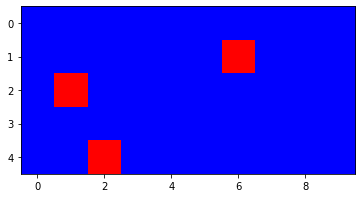

In [84]:
# create discrete colormap
data = np.random.rand(5, 10) * 20

cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,1,10]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)